In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
#to plot within notebook
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
##%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TheilSenRegressor
from sklearn.metrics import recall_score, precision_score
from mlxtend.plotting import plot_decision_regions

In [38]:
stocks = pd.read_csv('20microns.csv')
print(stocks.head())

   Unnamed: 0     SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
0           0  20MICRONS     EQ  37.80  37.80  36.15  36.85  37.40      37.05   
1           1  20MICRONS     EQ  52.90  61.70  52.90  59.40  59.65      52.80   
2           2  20MICRONS     EQ  36.15  36.30  35.60  36.05  36.00      35.65   
3           3  20MICRONS     EQ  44.35  44.80  43.55  43.90  43.60      44.80   
4           4  20MICRONS     EQ  36.00  36.75  34.20  34.90  34.90      35.40   

   TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
0      27130  9.946579e+05  2017-06-28          202  INE144J01027  
1    2489935  1.481265e+08  2017-11-28        14196  INE144J01027  
2      40594  1.461975e+06  2017-02-28          193  INE144J01027  
3      90170  3.984352e+06  2017-04-28          597  INE144J01027  
4      77310  2.709788e+06  2017-03-20          413  INE144J01027  


In [39]:
start16 = datetime(2016, 1, 1)
end16 = datetime(2016, 12, 31)
stamp16 = pd.date_range(start16, end16)

start17 = datetime(2017, 1, 1)
end17 = datetime(2017, 12, 31)
stamp17 = pd.date_range(start17, end17)

stocks['Date'] = pd.to_datetime(stocks.TIMESTAMP,format='%Y-%m-%d')
stocks.index = stocks['Date']
stocks['HL_PCT'] = (stocks['HIGH'] - stocks['LOW']) / stocks['LOW'] * 100.0
stocks.index = stocks['Date']
#stocks = stocks[[‘OPEN’, ‘HIGH’, ‘LOW’, ‘CLOSE’, ‘TOTTRDQTY’, ‘Date’, ‘PREVCLOSE’, ‘TOTTRDVAL’, ‘TOTALTRADES’]]

In [40]:
train = []
test = []
for index, rows in stocks.iterrows():
    if index in stamp16:
        train.append(list(rows))
    if index in stamp17:
        test.append(list(rows))
train = pd.DataFrame(train, columns = stocks.columns)
test = pd.DataFrame(test, columns = stocks.columns)

In [41]:
#Pre-Processing the Train Data 
X_train = train[['HL_PCT', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_train = X_train.to_dict(orient='records')
vec = DictVectorizer()
X = vec.fit_transform(x_train).toarray()
Y = np.asarray(train.CLOSE)
Y = Y.astype('int')
#Pre-Processing Test data
X_test = test[['HL_PCT', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_test = X_test.to_dict(orient='records')
vec = DictVectorizer()
x = vec.fit_transform(x_test).toarray()
y = np.asarray(test.CLOSE)
y = y.astype('int')

In [42]:
#Classifier
from sklearn.linear_model import TheilSenRegressor
clf = TheilSenRegressor()
clf.fit(X, Y) 
print("Accuracy of this Statistical Arbitrage model is: ",clf.score(x,y))
predict = clf.predict(x)
test['predict'] = predict

Accuracy of this Statistical Arbitrage model is:  0.3308546289386364


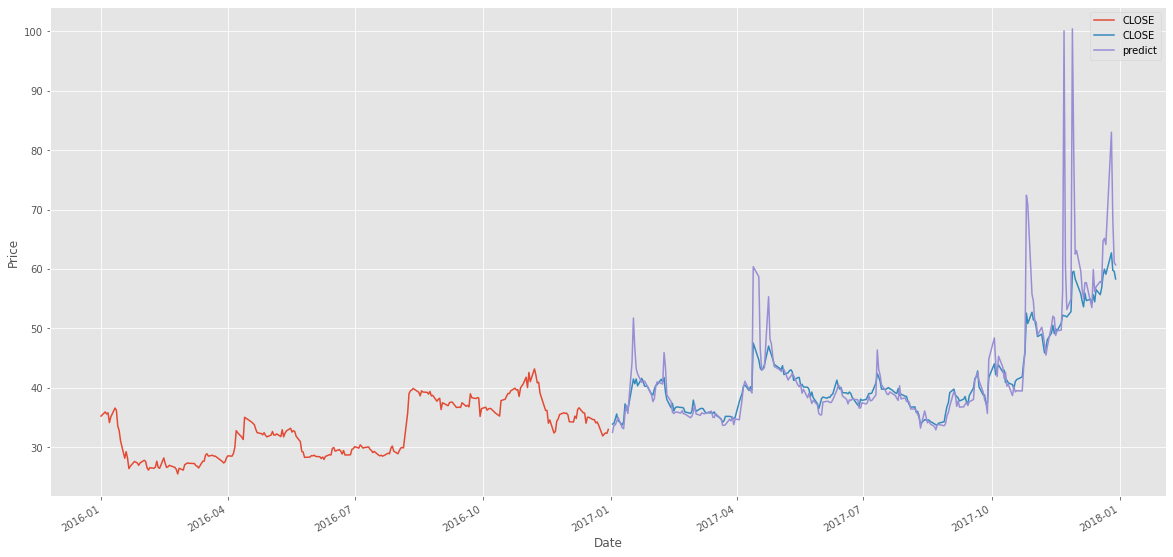

In [43]:
#Ploting 
train.index = train.Date
test.index = test.Date
train['CLOSE'].plot()
test['CLOSE'].plot()
test['predict'].plot()
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()